In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_video = cv2.VideoCapture('/Users/bogdanivanyuk/Desktop/player-localization/dataset/videos/13.mov')

In [3]:
imgs = list()

In [4]:
counter = 0
while True:
    ret, frame = test_video.read()
    #print(ret, frame)
    if not ret:
        break
    #plt.imshow(frame)
    #plt.show();
    imgs.append(frame)
    if counter >= 50:
        break
    counter += 1

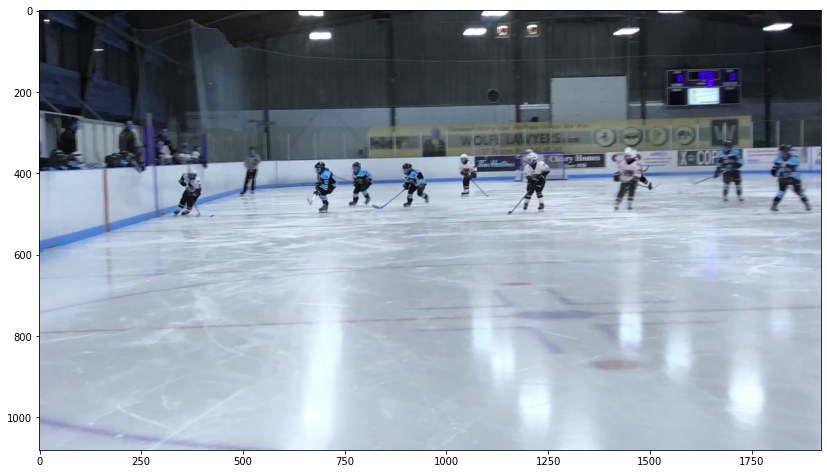

In [5]:
bgr_img = imgs[0]
plt.figure(figsize=(14, 10))
plt.imshow(bgr_img)
plt.show()

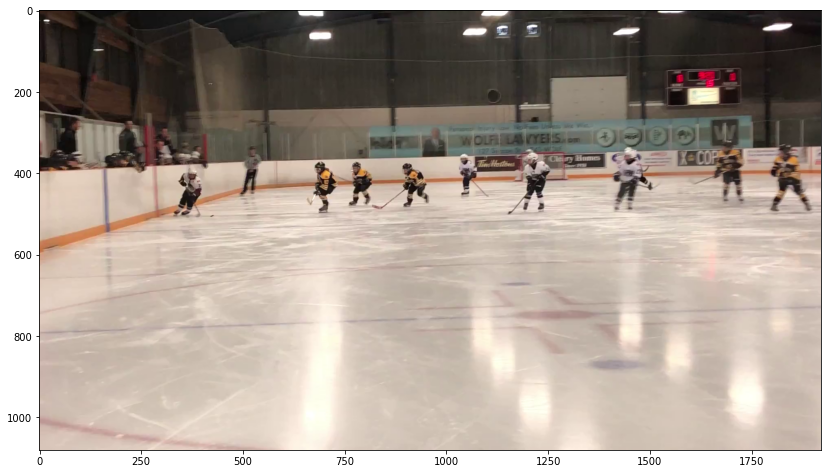

In [6]:
rgb_img = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14, 10))
plt.imshow(rgb_img)
plt.show()

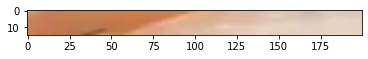

In [7]:
plt.imshow(rgb_img[565:580, :200, :])

In [8]:
rgb_img[565:580, :200, :]

array([[[215, 177, 142],
        [213, 175, 140],
        [210, 172, 137],
        ...,
        [221, 198, 183],
        [221, 198, 183],
        [221, 198, 183]],

       [[216, 167, 127],
        [213, 164, 124],
        [210, 161, 121],
        ...,
        [223, 200, 187],
        [223, 200, 187],
        [223, 200, 187]],

       [[206, 157, 117],
        [205, 156, 116],
        [202, 153, 113],
        ...,
        [224, 201, 188],
        [224, 201, 188],
        [224, 201, 188]],

       ...,

       [[202, 125,  88],
        [202, 125,  88],
        [202, 125,  88],
        ...,
        [229, 210, 194],
        [229, 210, 194],
        [229, 210, 194]],

       [[204, 125,  86],
        [204, 125,  86],
        [203, 124,  85],
        ...,
        [230, 212, 193],
        [229, 211, 192],
        [229, 211, 192]],

       [[204, 125,  86],
        [204, 125,  86],
        [203, 124,  85],
        ...,
        [230, 212, 193],
        [229, 211, 192],
        [229, 211, 192]]

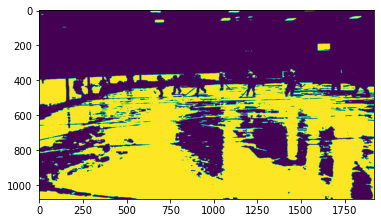

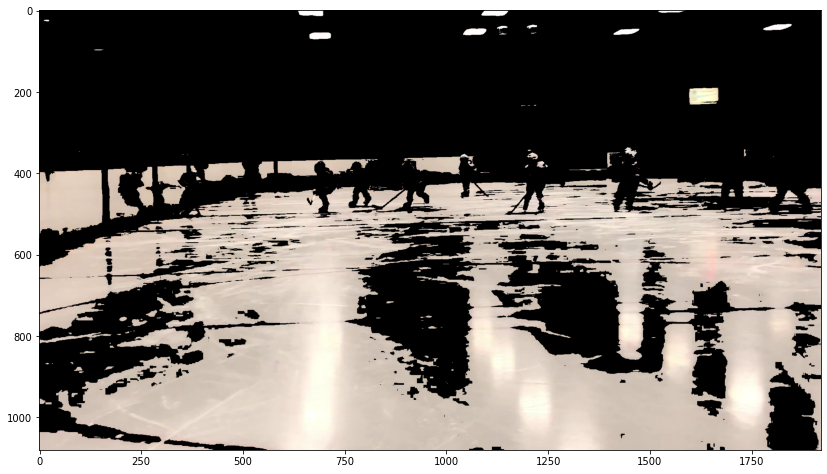

In [9]:
# image is expected be in RGB color space
def select_rgb_white_yellow(image): 
    lower = np.uint8([185, 190,   0])
    upper = np.uint8([255, 255, 255])
    yellow_mask = cv2.inRange(image, lower, upper)
    
    plt.imshow(yellow_mask)
    plt.show();
    
    masked = cv2.bitwise_and(image, image, mask = yellow_mask)
    return masked

res = select_rgb_white_yellow(rgb_img)
plt.figure(figsize=(14, 10))
plt.imshow(res)
plt.show()

In [13]:
(thresh, res) = cv2.threshold(res, 160, 255, cv2.THRESH_BINARY)

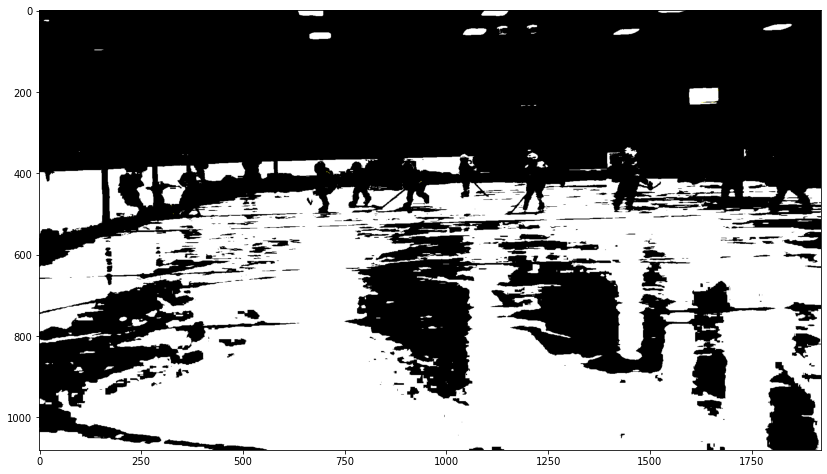

In [14]:
plt.figure(figsize=(14, 10))
plt.imshow(res)
plt.show()

In [17]:
contour, hier = cv2.findContours(res, cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contour:
    cv2.drawContours(res,[cnt],0,255,-1)

res = cv2.bitwise_not(res)
plt.figure(figsize=(14, 10))
plt.imshow(res)
plt.show()

error: OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


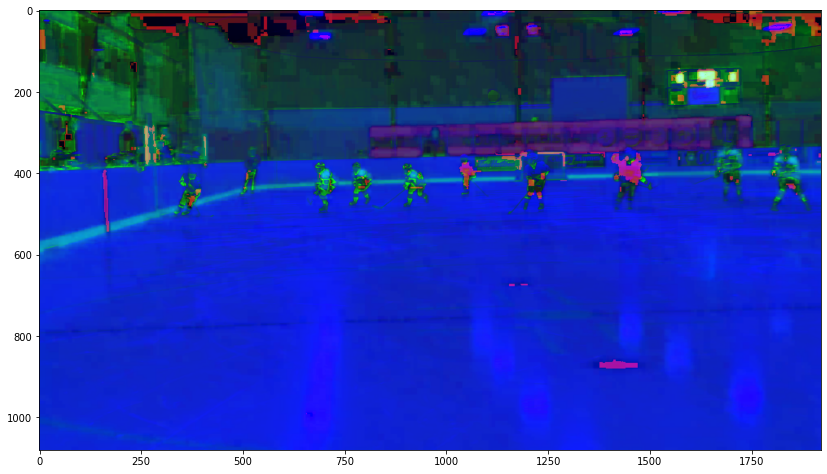

In [7]:
hsv_img = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2HSV)
plt.figure(figsize=(14, 10))
plt.imshow(hsv_img)
plt.show()

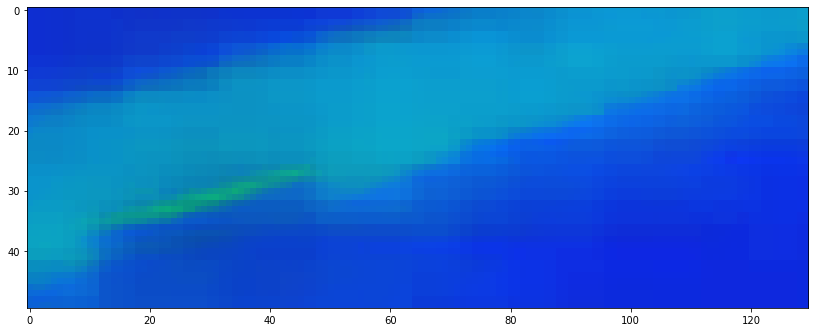

In [8]:
plt.figure(figsize=(14, 10))
plt.imshow(hsv_img[550:600, :130, :])
plt.show()

In [21]:
lower = np.array([10, 100, 0], dtype="uint8")
upper = np.array([15, 255, 255], dtype="uint8")
mask = cv2.inRange(hsv_img, lower, upper)

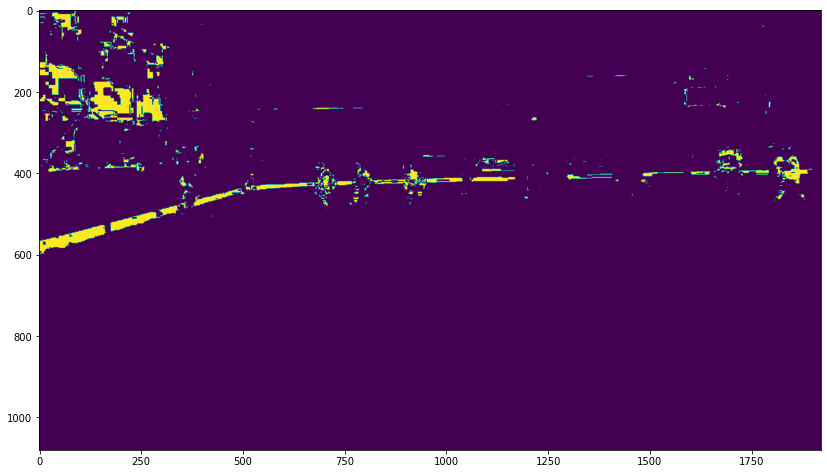

In [22]:
plt.figure(figsize=(14, 10))
plt.imshow(mask)
plt.show()

In [31]:
edges = cv2.Canny(hsv_img, 100, 200,apertureSize = 3)

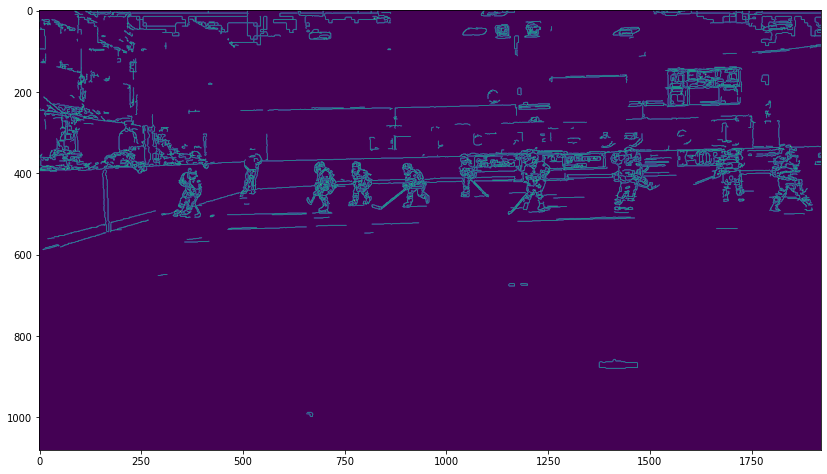

In [32]:
plt.figure(figsize=(14, 10))
plt.imshow(edges)
plt.show()

In [37]:
minLineLength = 500 
maxLineGap = 50

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 90, minLineLength, maxLineGap)

for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        #cv2.line(mask,(x1,y1),(x2,y2),(0,128,0),2)
        pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
        cv2.polylines(edges, [pts], True, (0,255,0))

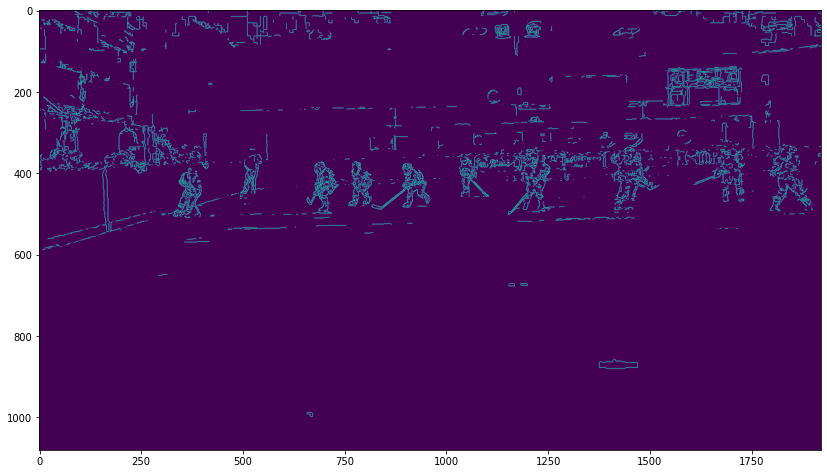

In [38]:
plt.figure(figsize=(14, 10))
plt.imshow(edges)
plt.show()